In [2]:
import tensorflow as tf

In [4]:
import entangled_circuit
import qiskit
entangled_circuit.create_Wchain_layered_ansatz(qiskit.QuantumCircuit(4,4)).depth()

6

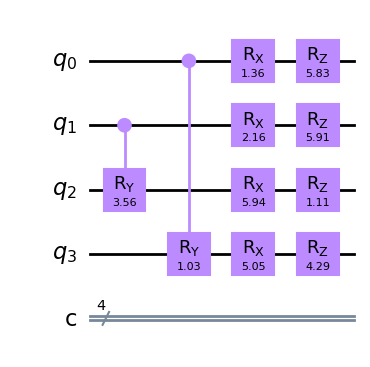

In [10]:
entangled_circuit.create_Walternating_layered_ansatz(qiskit.QuantumCircuit(4,4)).draw('mpl')

In [ ]:
2(4-2) + 1

In [19]:
import keras, math, qiskit
import numpy as np
import keras.layers as krl
import classical_part, entangled_circuit, constant
import types
import tensorflow as tf
from classical_part import measure, normalize_count, add_padding
class QuanvLayer(keras.layers.Layer):
    def __init__(self, filter, **kwargs):
        super().__init__(**kwargs)
        self.filter = filter
        self.n_qubit = 0
    def build(self, image):
        # self.trainable_quanv(image)
        self.thetas = self.add_weight(
            shape=(self.n_qubit,),
            initializer="random_normal",
            trainable=True,
            dtype="float32"
        )

    def trainable_connector(self, vector, filter: types.FunctionType, thetas):
        """If sub-image has the size
        2 x 2 => require 2 qubits
        3 x 3 => require 4 qubits
        4 x 4 => require 4 qubits
        5 x 5 => require 5 qubits
        6 x 6 => require 6 qubits
        7 x 7 => require 6 qubits
        8 x 8 => require 6 qubits
        Args:
            vector (np.ndarray): quantum state
            filter (types.FunctionType): quantum circuit

        Returns:
            np.ndarray: probability vector
        """
        
        n = math.ceil(np.log2(vector.shape[0]))
        self.n_qubit = n
        if vector.shape[0] < 2**n:
            vector = np.concatenate([vector, np.array([0]*(2**n-vector.shape[0]))])
        qc = qiskit.QuantumCircuit(n, n)
        qc.initialize(vector, range(0, n))
        qc = filter(qc, self.thetas)
        counts = measure(qc, list(range(0, n)))
        normalized_count = normalize_count(counts, n)
        return normalized_count

    def trainable_quanv(self, inputs):
        
        image = inputs
        n_image = 28
        # n_image = image.shape[0]
        kernel_size = constant.quanv_size_filter
        if n_image % kernel_size != 0:
            padding_size = kernel_size - n_image % kernel_size
            image = add_padding(image, (int(np.ceil(padding_size / 2)), int(np.ceil(padding_size / 2))))
            n_image = image.shape[0]
        
        num_deep = constant.get_quanv_num_filter(kernel_size)
        out = np.zeros((n_image // kernel_size, n_image // kernel_size,
                    num_deep), dtype=np.float32)
        
        for i in range(0, n_image, kernel_size):
            for j in range(0, n_image, kernel_size):
                sub_image = image[i:i + kernel_size, j:j + kernel_size]
                
                # Turn normal image to quantum state
                if np.all(sub_image == 0):
                    sub_image[0] = 1
                sub_image = np.squeeze(sub_image)
                sub_image = sub_image / np.linalg.norm(sub_image)
            
                
                # Convert quantum state to quantum probabilities
                # If required deep size > default, add more quanv circuit
                num_filter = math.ceil(num_deep / kernel_size**2)
                exp_valuess = np.asarray([])
                for i in range(num_filter):
                    
                    exp_values = self.trainable_connector(sub_image.flatten(), self.filter. self.thetas)
                    exp_valuess = np.concatenate((exp_valuess, exp_values), axis=None)
                #print(sub_image.flatten())
                for c in range(out.shape[2]):
                    try:
                        out[i // kernel_size, j // kernel_size, c] = exp_valuess[c]
                    except:
                        pass
        return [0, 1]

    def call(self, inputs):
        print(inputs.dtype) 
        #print(self.trainable_quanv(inputs))
        #return tf.convert_to_tensor(self.trainable_quanv(inputs))
        return tf.convert_to_tensor([0, 1])
# class UpdateQuanv(keras.callbacks.Callback):
#     def on_train_begin(self, logs={}):
#         print("Hello")
#         self.losses = []

#     def on_batch_end(self, batch, logs={}):
#         print(logs)
#         print(logs.get('loss'))
#         self.losses.append(logs.get('loss'))
        
x_train, y_train, _, _, _,_ = classical_part.load_mnist(100, 10, 10, None)

In [20]:
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim

import keras, math, qiskit
import numpy as np
import keras.layers as krl
import classical_part, entangled_circuit, constant
import types
import tensorflow as tf
from classical_part import measure, normalize_count, add_padding
class QuanvLayer(keras.layers.Layer):
    def __init__(self, filter, **kwargs):
        super().__init__(**kwargs)
        self.filter = filter
        self.n_qubit = 0
    def build(self, image):
        # self.trainable_quanv(image)
        self.thetas = self.add_weight(
            shape=(self.n_qubit,),
            initializer="random_normal",
            trainable=True,
            dtype="float32"
        )

    def trainable_connector(self, vector, filter: types.FunctionType, thetas):
        """If sub-image has the size
        2 x 2 => require 2 qubits
        3 x 3 => require 4 qubits
        4 x 4 => require 4 qubits
        5 x 5 => require 5 qubits
        6 x 6 => require 6 qubits
        7 x 7 => require 6 qubits
        8 x 8 => require 6 qubits
        Args:
            vector (np.ndarray): quantum state
            filter (types.FunctionType): quantum circuit

        Returns:
            np.ndarray: probability vector
        """
        
        n = math.ceil(np.log2(vector.shape[0]))
        self.n_qubit = n
        if vector.shape[0] < 2**n:
            vector = np.concatenate([vector, np.array([0]*(2**n-vector.shape[0]))])
        qc = qiskit.QuantumCircuit(n, n)
        qc.initialize(vector, range(0, n))
        qc = filter(qc, self.thetas)
        counts = measure(qc, list(range(0, n)))
        normalized_count = normalize_count(counts, n)
        return normalized_count

    def trainable_quanv(self, inputs):
        
        image = inputs
        n_image = 28
        # n_image = image.shape[0]
        kernel_size = constant.quanv_size_filter
        if n_image % kernel_size != 0:
            padding_size = kernel_size - n_image % kernel_size
            image = add_padding(image, (int(np.ceil(padding_size / 2)), int(np.ceil(padding_size / 2))))
            n_image = image.shape[0]
        
        num_deep = constant.get_quanv_num_filter(kernel_size)
        out = np.zeros((n_image // kernel_size, n_image // kernel_size,
                    num_deep), dtype=np.float32)
        
        for i in range(0, n_image, kernel_size):
            for j in range(0, n_image, kernel_size):
                sub_image = image[i:i + kernel_size, j:j + kernel_size]
                
                # Turn normal image to quantum state
                if np.all(sub_image == 0):
                    sub_image[0] = 1
                sub_image = np.squeeze(sub_image)
                sub_image = sub_image / np.linalg.norm(sub_image)
            
                
                # Convert quantum state to quantum probabilities
                # If required deep size > default, add more quanv circuit
                num_filter = math.ceil(num_deep / kernel_size**2)
                exp_valuess = np.asarray([])
                for i in range(num_filter):
                    
                    exp_values = self.trainable_connector(sub_image.flatten(), self.filter. self.thetas)
                    exp_valuess = np.concatenate((exp_valuess, exp_values), axis=None)
                #print(sub_image.flatten())
                for c in range(out.shape[2]):
                    try:
                        out[i // kernel_size, j // kernel_size, c] = exp_valuess[c]
                    except:
                        pass
        return [0, 1]

    def call(self, inputs):
        print(inputs.dtype) 
        #print(self.trainable_quanv(inputs))
        #return tf.convert_to_tensor(self.trainable_quanv(inputs))
        return tf.convert_to_tensor([0, 1])
# class UpdateQuanv(keras.callbacks.Callback):
#     def on_train_begin(self, logs={}):
#         print("Hello")
#         self.losses = []

#     def on_batch_end(self, batch, logs={}):
#         print(logs)
#         print(logs.get('loss'))
#         self.losses.append(logs.get('loss'))
 

In [104]:
import tensorflow as tf
from keras.layers import Conv2D, Dense, Dropout, Flatten, MaxPooling2D
from keras.models import Sequential
from keras.optimizers import Adam

loss_fn = tf.keras.losses.CategoricalCrossentropy()
optimizer = Adam(lr=0.001)
model = classical_part.hybrid_model()
x_train, y_train, x_val, y_val, x_test, y_test= classical_part.load_mnist(100, 10, 10, None)
x_train = x_train[:, None, :, :]
epochs = 2
for epoch in range(epochs):
    print("\nStart of epoch %d" % (epoch,))
    # Iterate over the batches of the dataset.
    for step in range(len(x_train)):

        # Open a GradientTape to record the operations run
        # during the forward pass, which enables auto-differentiation.
        with tf.GradientTape() as tape:

            # Run the forward pass of the layer.
            # The operations that the layer applies
            # to its inputs are going to be recorded
            # on the GradientTape.
        
            logits = model(x_train[step], training=True)
            logits = tf.reshape(logits, (10,))
            # Compute the loss value for this minibatch.
            loss_value = loss_fn(y_train[step], logits)

        # Use the gradient tape to automatically retrieve
        # the gradients of the trainable variables with respect to the loss.
        grads = tape.gradient(loss_value, model.trainable_weights)

        # Run one step of gradient descent by updating
        # the value of the variables to minimize the loss.
        optimizer.apply_gradients(zip(grads, model.trainable_weights))

        # Log every 200 batches.
        if step % 200 == 0:
            print(
                "Training loss (for one batch) at step %d: %.4f"
                % (step, float(loss_value))
            )
            print("Seen so far: %s samples" % ((step + 1)))


Start of epoch 0
tf.Tensor(
[0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00
 0.0000000e+00 1.0000000e+00 0.0000000e+00 0.0000000e+00 1.8015785e-26], shape=(10,), dtype=float32)
Training loss (for one batch) at step 0: 16.1181
Seen so far: 1 samples
tf.Tensor(
[0.0000000e+00 0.0000000e+00 3.2067355e-21 5.3578786e-26 1.0000000e+00
 8.0856606e-29 0.0000000e+00 0.0000000e+00 0.0000000e+00 1.8341224e-25], shape=(10,), dtype=float32)
tf.Tensor(
[0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00 9.9999166e-01
 0.0000000e+00 2.3025451e-28 0.0000000e+00 8.3039695e-06 0.0000000e+00], shape=(10,), dtype=float32)
tf.Tensor(
[2.5945903e-18 1.0003360e-37 0.0000000e+00 0.0000000e+00 4.7937383e-22
 0.0000000e+00 7.4016178e-13 2.9717937e-28 0.0000000e+00 1.0000000e+00], shape=(10,), dtype=float32)
tf.Tensor([0. 0. 1. 0. 0. 0. 0. 0. 0. 0.], shape=(10,), dtype=float32)
tf.Tensor(
[4.4467138e-21 6.7691263e-16 1.0385302e-17 0.0000000e+00 1.5146906e-29
 3.0826632e-14 1.6819005e